In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from plotly.offline import iplot
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, MinMaxScaler

In [3]:
movies = pd.read_csv("movies.csv",encoding="Latin1")
Ratings = pd.read_csv("ratings.csv")
Mean = Ratings.groupby(by="userId",as_index=False)['rating'].mean()
Rating_avg = pd.merge(Ratings,Mean,on='userId')
Rating_avg['adg_rating']=Rating_avg['rating_x']-Rating_avg['rating_y']
Rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,adg_rating
0,1,296,5.0,1147880044,3.814286,1.185714
1,1,306,3.5,1147868817,3.814286,-0.314286
2,1,307,5.0,1147868828,3.814286,1.185714
3,1,665,5.0,1147878820,3.814286,1.185714
4,1,899,3.5,1147868510,3.814286,-0.314286


In [5]:
Rating_avg.sample(n=10000)

,userId,movieId,rating_x,timestamp,rating_y,adg_rating
17725144,114897,1259,4.0,862624065,4.013245,-0.013245
14204463,92033,47,5.0,1483957909,4.055556,0.944444
11025061,71681,1230,4.0,974385495,3.886792,0.113208
13379171,86572,968,4.0,1360544683,3.808722,0.191278
8728767,56890,8360,4.0,1111460736,3.078502,0.921498
...,...,...,...,...,...,...
16929540,109748,2762,4.0,1472052433,4.109848,-0.109848
19148375,124233,96737,4.5,1457895920,3.629032,0.870968
4583869,30024,36535,3.0,1573251441,3.255970,-0.255970
6897345,44757,1258,2.5,1532942138,2.547800,-0.047800


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
final=pd.pivot_table(Rating_avg.sample(n=10000), values='adg_rating', index='userId', columns='movieId')
final

movieId,1,2,3,4,5,6,7,8,9,10,...,196937,197711,197875,199364,199992,200574,200838,201170,202439,202519
userId,,,,,,,,,,,,,,,,,,,,,
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_movie = final.fillna(final.mean(axis=0))
final_movie

movieId,1,2,3,4,5,6,7,8,9,10,...,196937,197711,197875,199364,199992,200574,200838,201170,202439,202519
userId,,,,,,,,,,,,,,,,,,,,,
72,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
113,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
187,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
225,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
226,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162495,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
162497,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903
162498,0.463702,-0.429881,-0.451291,-0.618497,0.045623,0.322837,0.31797,-0.5,-0.572684,0.046389,...,-0.980324,1.469851,-0.259298,-0.223333,0.710345,-1.555234,-0.719715,0.245375,0.65,-0.45903


In [ ]:
distortions = []
num_clusters =  range(1,50)


for n in num_clusters:
    print("-", end = '')
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(final_movie)
    distortions.append(kmeans.inertia_)
    
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

----------------------------------

In [5]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(final_movie)
cluster_pred = kmeans.predict(final_movie)
cluster_pred

array([7, 7, 7, ..., 0, 7, 8])

In [6]:
final_movie.values

array([[ 0.26817896, -0.21950982, -0.34115196, ...,  0.06395349,
        -0.43119266,  0.8924155 ],
       [-0.13043478, -0.21950982, -0.34115196, ...,  0.06395349,
        -0.43119266,  0.8924155 ],
       [ 0.30259146, -0.21950982, -0.34115196, ...,  0.06395349,
        -0.43119266,  0.8924155 ],
       ...,
       [ 0.26817896,  0.20772947, -0.34115196, ...,  0.06395349,
        -0.43119266,  0.8924155 ],
       [ 0.26817896, -0.21950982, -0.34115196, ...,  0.06395349,
        -0.43119266,  0.8924155 ],
       [ 2.14697406,  0.14697406,  0.14697406, ...,  0.06395349,
        -0.43119266,  0.8924155 ]])

In [7]:
x = final_movie.values
pca = PCA(n_components= 2, random_state=0)
pca.fit_transform(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1','PCA2'])
principalDf

,PCA1,PCA2
0,0.037312,-0.360983
1,1.463081,0.617160
2,0.669706,-0.789996
3,0.754455,-1.296655
4,0.636002,0.231586
...,...,...
6742,-0.698223,-0.044926
6743,2.027978,-0.456034
6744,1.633442,1.206941
6745,-1.609207,-0.041550


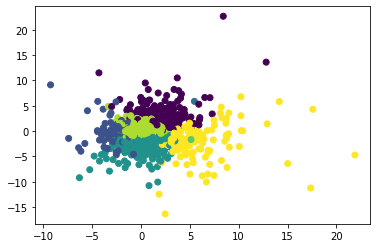

In [8]:
plt.scatter(principalDf['PCA1'], principalDf['PCA2'], c=cluster_pred)

In [9]:
def get_user_similar_movies( user1, user2 ):
    common_movies = Rating_avg[Rating_avg.userId == user1].merge(
    Rating_avg[Rating_avg.userId == user2],
    on = "movieId",
    how = "inner" )
    return common_movies.merge( movies, on = 'movieId' )

In [9]:
a = get_user_similar_movies(1,2)
a = a.loc[ : , ['rating_x_x','rating_x_y','title']]
a.head()

NameError: name 'get_user_similar_movies' is not defined